<a href="https://colab.research.google.com/github/Touhed/CCFD/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Packages#

In [5]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools
from sklearn.manifold import TSNE # T-Distributed Stochastic Neighbor Embedding
import seaborn as sns

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import gc
from datetime import datetime 

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

#Importing Data#

**Connecting Google Drive**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
# IMPORTING DATA

data = pd.read_csv('/content/drive/MyDrive/Thesis/CSV/creditcard.csv')
data.drop('Time', axis = 1, inplace = True) # removing irrelevent columns/feature
data.shape
data.head(5)
#print(data.head(5))

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#Data Processing and Exploratory Data Analysis (EDA)#

**Case Count**

In [10]:
cases = len(data)
nonfraud_count = len(data[data.Class == 0])
fraud_count = len(data[data.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are:-> {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-Fraud cases are:-> {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of Fraud cases are:-> {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of Fraud cases is:-> {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are:-> 284807
Number of Non-Fraud cases are:-> 284315
Number of Fraud cases are:-> 492
Percentage of Fraud cases is:-> 0.17
--------------------------------------------


**Checking null or nan values**

In [17]:
print(data.info())
#data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

**CASE AMOUNT STATISTICS**

In [13]:
nonfraud_cases = data[data.Class == 0]
fraud_cases = data[data.Class == 1]

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))

CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------


**Normalizing using the ‘StandardScaler’ method**

In [15]:
sc = StandardScaler()
amount = data['Amount'].values

data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(data['Amount'].head(5), attrs = ['bold']))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: Amount, dtype: float64


**Data Cleansing**

In [ ]:
# Only use the 'Amount' and 'V1', ..., 'V28' features
features = ['V%d' % number for number in range(1, 10)] + ['Amount']
#In above, I used '10' to limit the subplots but actually we have to use '29'.

# The target variable which we would like to predict, is the 'Class' variable
target = 'Class'

# Now create an X variable (containing the features) and an y variable (containing only the target variable)
X = data[features]
y = data[target]

# Plot histograms of each parameter 
X.hist(figsize = (10, 10))
plt.show()

In [ ]:
var = data.columns.values

i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(6,5,figsize=(25,25))

for feature in var:
    i += 1
    plt.subplot(6,5,i)
    sns.kdeplot(t0[feature], bw_adjust=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw_adjust=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=14)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

#Feature Selection & Data Split#

In [25]:
# DATA SPLIT

X = data.drop('Class', axis = 1).values
y = data['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:20])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:20])

X_train samples :  [[-1.11504743e+00  1.03558276e+00  8.00712441e-01 -1.06039825e+00
   3.26211690e-02  8.53422160e-01 -6.14243480e-01 -3.23116112e+00
   1.53994798e+00 -8.16908791e-01 -1.30559201e+00  1.08177199e-01
  -8.59609580e-01 -7.19342108e-02  9.06655628e-01 -1.72092961e+00
   7.97853221e-01 -6.75939779e-03  1.95677806e+00 -6.44895565e-01
   3.02038533e+00 -5.39617976e-01  3.31564886e-02 -7.74945766e-01
   1.05867812e-01 -4.30853482e-01  2.29736936e-01 -7.05913036e-02
   1.29500000e+01]]
X_test samples :  [[-3.23333572e-01  1.05745525e+00 -4.83411518e-02 -6.07204308e-01
   1.25982115e+00 -9.17607168e-02  1.15910150e+00 -1.24334606e-01
  -1.74639536e-01 -1.64440065e+00 -1.11886302e+00  2.02647310e-01
   1.14596495e+00 -1.80235956e+00 -2.47177932e-01 -6.09453515e-02
   8.46605738e-01  3.79454387e-01  8.47262245e-01  1.86409421e-01
  -2.07098267e-01 -4.33890272e-01 -2.61613283e-01 -4.66506063e-02
   2.11512300e-01  8.29721214e-03  1.08494430e-01  1.61139167e-01
   4.00000000e+01]]

#Modeling#

In [26]:
# MODELING
# 1. Decision Tree
tree_model = DecisionTreeClassifier(max_depth = 10, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

# 2. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

# 3. Random Forest Tree
rf = RandomForestClassifier(max_depth = 10)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

# 4. XGBoost
xgb = XGBClassifier(max_depth = 10)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#Evaluation#

**1. Accuracy score**

In [ ]:
# 1. Accuracy score

print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)), attrs = ['bold'], color = 'blue'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.9993504441557529
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9991924440855307
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.9994557775359011
------------------------------------------------------------------------
Accuracy score of the XGBoost model is 0.9995786664794073
------------------------------------------------------------------------


**2. F1 Score**

In [ ]:
# 2. F1 score

print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)), attrs = ['bold'], color = 'blue'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.8102564102564104
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.7356321839080459
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.8324324324324324
------------------------------------------------------------------------
F1 score of the XGBoost model is 0.8749999999999999
------------------------------------------------------------------------


**3. Confusion Matrix**

In [ ]:
## Model with randomforest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def random_forest_classifier(X_train, y_train, X_test, y_test):
     # initialize object for DecisionTreeClassifier class
     rf_classifier = RandomForestClassifier(n_estimators=50)
     # train model by using fit method
     print("Model testing starts........")
     rf_classifier.fit(X_train, y_train.ravel())
     acc_score = rf_classifier.score(X_test, y_test)
     print(f'Accuracy of Random Forest model on test dataset :-> {acc_score}')
     # predict result using test dataset
     y_pred = rf_classifier.predict(X_test)
     # confusion matrix
     print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred)}")
     # classification report for f1-score
     print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")


# calling random_forest_classifier
random_forest_classifier(X_train, y_train, X_test, y_test)

Model testing starts........
Accuracy of Random Forest model on test dataset :-> 0.9995084442259752
Confusion Matrix :- 
 [[56854     7]
 [   21    80]]
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.79      0.85       101

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
## Model with xgboost

from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def xg_boost_classifier(X_train, y_train, X_test, y_test):
     # initialize object for DecisionTreeClassifier class
     xgb_classifier = XGBClassifier(n_estimators=50)
     # train model by using fit method
     print("Model testing starts........")
     xgb_classifier.fit(X_train, y_train.ravel())
     acc_score = xgb_classifier.score(X_test, y_test)
     print(f'Accuracy of XGBoost model on test dataset :-> {acc_score}')
     # predict result using test dataset
     y_pred = xgb_classifier.predict(X_test)
     # confusion matrix
     print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred)}")
     # classification report for f1-score
     print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")


# calling random_forest_classifier
xg_boost_classifier(X_train, y_train, X_test, y_test)

Model testing starts........
Accuracy of XGBoost model on test dataset :-> 0.9994382219725431
Confusion Matrix :- 
 [[56853     8]
 [   24    77]]
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.91      0.76      0.83       101

    accuracy                           1.00     56962
   macro avg       0.95      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962



**4. Confution Matrix on Plot Function**

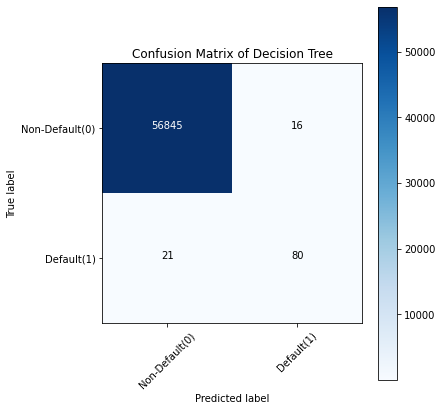

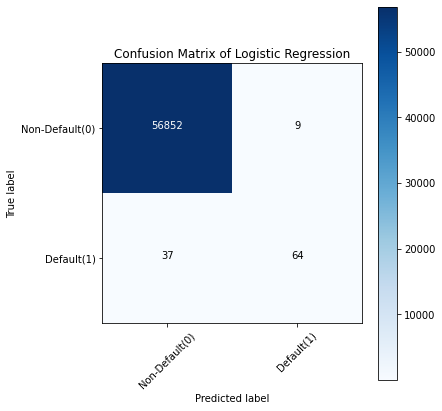

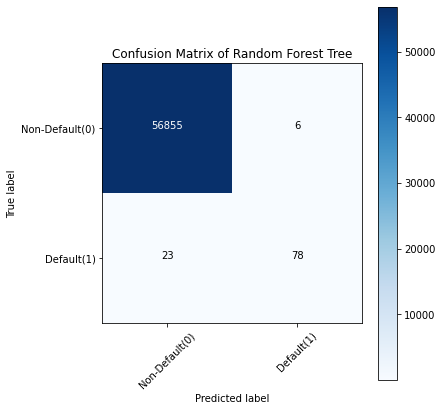

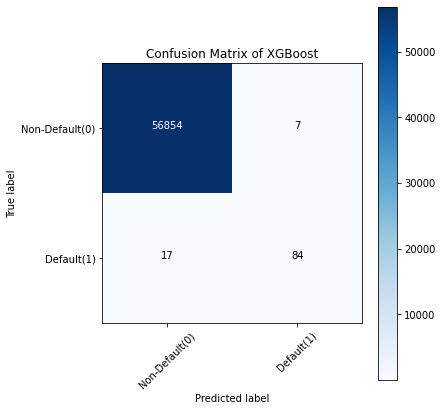

In [ ]:
# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# 2. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

# 3. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

# 4. XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()

**5. Plotting the Correlation Matrix**

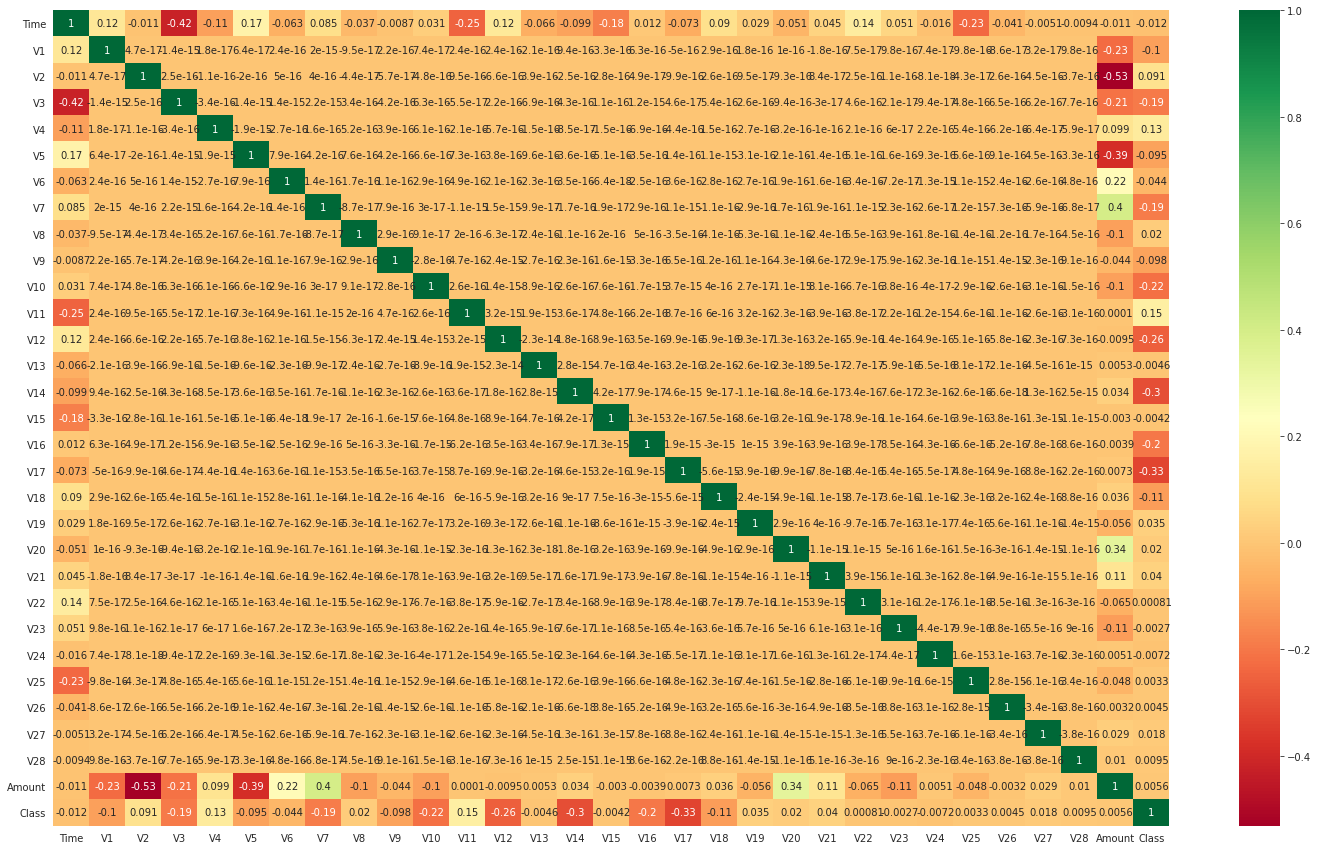

In [ ]:
# Correlation matrix 
corrmat = data.corr()
top_cor_features = corrmat.index
plt.figure(figsize = (25, 15)) 
g=sns.heatmap(data[top_cor_features].corr(),annot=True,cmap="RdYlGn")
#sns.heatmap(corrmat, vmax = .9, square = True) 
#plt.show() 

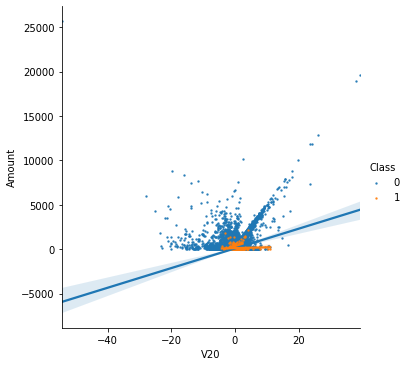

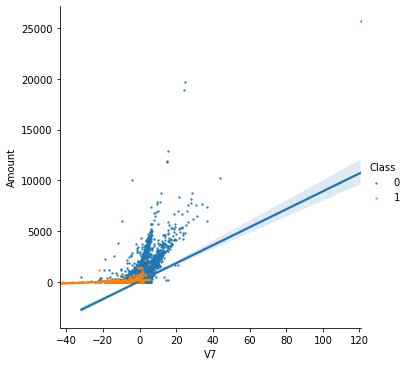

In [ ]:
s = sns.lmplot(x='V20', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()